# **IBM HR Analysis with Decision Tress& Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv("/content/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Mengubah 1.0 ke 'Yes' dan 0.0 ke 'No'
df['Attrition'] = df['Attrition'].replace({1.0: 'Yes', 0.0: 'No'})

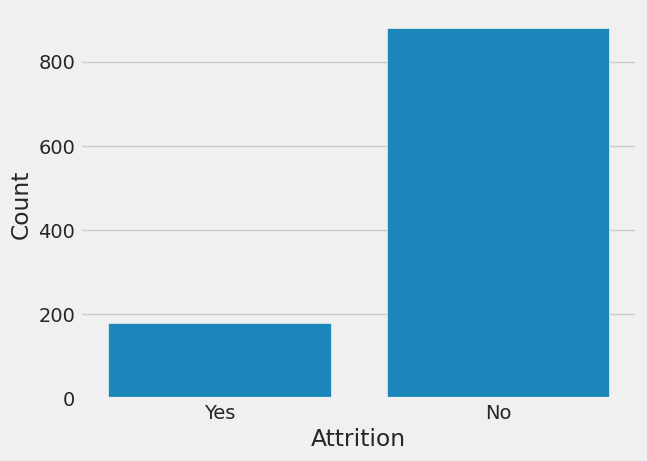

In [ ]:
sns.countplot(x='Attrition', data=df)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [ ]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis="columns", inplace=True)

categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

df['Attrition'] = df.Attrition.astype("category").cat.codes

## **Data Processing**

In [ ]:
categorical_col.remove('Attrition')

ValueError: list.remove(x): x not in list

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Menerapkan Algoritma Decision Tree & Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### 1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              -1      0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0       1.0        1.0           1.0
support    295.0  601.0  133.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[295   0   0]
 [  0 601   0]
 [  0   0 133]]

Test Result:
Accuracy Score: 42.86%
_______________________________________________
CLASSIFICATION REPORT:
                   -1           0          1  accuracy   macro avg  \
precision    0.234375    0.613169   0.142857  0.428571    0.330134   
recall       0.256410    0.535971   0.217391  0.428571    0.336591   
f1-score     0.244898    0.571977   0.172414  0.428571    0.329763   
support    117.000000  278.000000  46.000000  0.428571  441

### 2. Decision Tree Classifier Hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 58.41%
_______________________________________________
CLASSIFICATION REPORT:
              -1           0      1  accuracy    macro avg  weighted avg
precision    0.0    0.584062    0.0  0.584062     0.194687      0.341129
recall       0.0    1.000000    0.0  0.584062     0.333333      0.584062
f1-score     0.0    0.737423    0.0  0.584062     0.245808      0.430701
support    295.0  601.000000  133.0  0.584062  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[  0 295   0]
 [  0 601   0]
 [  0 133   0]]

Test Result:
Accuracy Score: 63.04%
_______________________________________________
CLASSIFICATION REPORT:
              -1           0     1  accuracy   macro avg  weighted avg
precision    0.0    0.630385   0.0  0.630385    0.210128      0.397386
recall       0.0    1.000000   0.0  0.630

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted

### Visualisasi dari Decision Tree

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

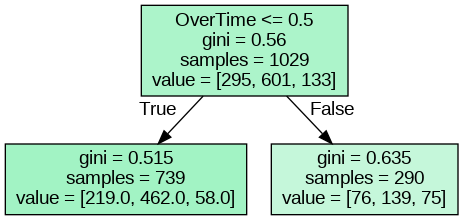

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              -1      0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0       1.0        1.0           1.0
support    295.0  601.0  133.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[295   0   0]
 [  0 601   0]
 [  0   0 133]]

Test Result:
Accuracy Score: 61.22%
_______________________________________________
CLASSIFICATION REPORT:
                   -1           0          1  accuracy   macro avg  \
precision    0.173913    0.644279   0.437500  0.612245    0.418564   
recall       0.034188    0.931655   0.152174  0.612245    0.372672   
f1-score     0.057143    0.761765   0.225806  0.612245    0.348238   
support    117.000000  278.000000  46.000000  0.612245  441

### Random Forest Hyperparameter Tuning

a. Randomized Search Cross Validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='f1',
    param_distributions=random_grid,
    n_iter=200,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              -1      0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0    1.0       1.0        1.0           1.0
support    295.0  601.0  133.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[295   0   0]
 [  0 601   0]
 [  0   0 133]]

Test Result:
Accuracy Score: 62.36%
_______________________________________________
CLASSIFICATION REPORT:
              -1           0          1  accuracy   macro avg  weighted avg
precision    0.0    0.643541   0.400000  0.623583    0.347847      0.447402
recall       0.0    0.967626   0.130435  